In [ ]:
# Import nltk
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
# Read a page
import urllib.request
response =  urllib.request.urlopen('https://en.wikipedia.org/wiki/Nasdaq')
html = response.read()
print(html)

In [ ]:
# Read only the relevant data, no html needed here
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)
print(text)

In [ ]:
# Generate tokens
tokens = [t for t in text.split()]
print(tokens)

In [ ]:
# Plot the word frequency

freq = nltk.FreqDist(tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))


In [ ]:
# Plot it
freq.plot(20, cumulative=False)

## See the need for stop words removal?

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acaho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


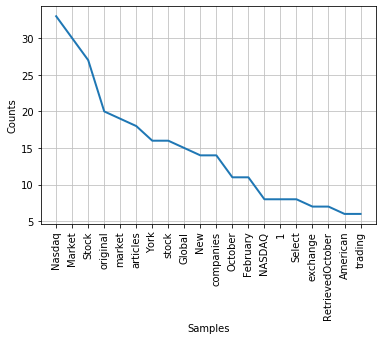

In [29]:

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stop_words:
        clean_tokens.remove(token)
        
# This time compute the frequency on clean_tokens
clean_freq = nltk.FreqDist(clean_tokens)
clean_freq.plot(20, cumulative=False)

## Stemming

In [39]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
porter = PorterStemmer() # Suffix stripping
lancaster=LancasterStemmer() #Ruled based

word_list = ["friend", "friendship", "friends", "friendships","destabilize","misunderstanding","railroad","moonlight","football"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))


Word                Porter Stemmer      lancaster Stemmer   
friend              friend              friend              
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
stabil              stabil              stabl               
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acaho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:

# Romanian stemmer
text = "Banca Naţională a României este banca centrală a României. Este o instituţie publică independentă, cu sediul central în municipiul Bucureşti."
stemmer = SnowballStemmer("romanian")
stemmed_words = [stemmer.stem(word) for word in word_tokenize(text)]
print(stemmed_words)


['banc', 'naţional', 'a', 'român', 'este', 'banc', 'central', 'a', 'român', '.', 'este', 'o', 'instituţ', 'public', 'independent', ',', 'cu', 'sed', 'central', 'în', 'municip', 'bucur', '.']


## Lemmatisation


In [48]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

sentence = "All US exchanges adhere to standard federal holidays closures. The markets are closed on the following days in 2019."
words = nltk.word_tokenize(sentence)
sentence_words=[word.lower() for word in words if word.isalpha()]
print(sentence_words)

sentence_words
print("{0:20}{1:20}".format("Word","Lemma","Stem"))
for word in sentence_words:
    print ("{0:20}{1:20}{2:30}".format(word,wordnet_lemmatizer.lemmatize(word), porter.stem(word)))

['all', 'us', 'exchanges', 'adhere', 'to', 'standard', 'federal', 'holidays', 'closures', 'the', 'markets', 'are', 'closed', 'on', 'the', 'following', 'days', 'in']
Word                Lemma               
all                 all                 all                 
us                  u                   us                  
exchanges           exchange            exchang             
adhere              adhere              adher               
to                  to                  to                  
standard            standard            standard            
federal             federal             feder               
holidays            holiday             holiday             
closures            closure             closur              
the                 the                 the                 
markets             market              market              
are                 are                 are                 
closed              closed              close               
o

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acaho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Disambiguating word meaning

In [73]:
from nltk.corpus import wordnet as wn
for ss in wn.synsets('bass'):
    print(ss, ss.definition())

Synset('bass.n.01') the lowest part of the musical range
Synset('bass.n.02') the lowest part in polyphonic music
Synset('bass.n.03') an adult male singer with the lowest voice
Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae
Synset('freshwater_bass.n.01') any of various North American freshwater fish with lean flesh (especially of the genus Micropterus)
Synset('bass.n.06') the lowest adult male singing voice
Synset('bass.n.07') the member with the lowest range of a family of musical instruments
Synset('bass.n.08') nontechnical name for any of numerous edible marine and freshwater spiny-finned fishes
Synset('bass.s.01') having or denoting a low vocal or instrumental range


In [67]:
from nltk.wsd import lesk
sense1 = lesk(word_tokenize("I went fishing for some sea bass."),"bass")
print(sense1, sense1.definition())
sense1 = lesk(word_tokenize("The bass line of the song is too weak."),"bass")
print(sense1, sense1.definition())

Synset('bass.n.08') nontechnical name for any of numerous edible marine and freshwater spiny-finned fishes
Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae


## Towards Machine Learning

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = ['John likes ice cream', 'John hates chocolate.']

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
print(vectorizer.vocabulary_)

{'John': 0, 'likes': 5, 'ice': 4, 'cream': 2, 'hates': 3, 'chocolate': 1}


In [ ]:
word_count_vector = vectorizer.transform(sentences)
word_count_vector.toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(word_count_vector)
tfidf_tranformer.transform(sentences)